bound states eigenergy is:  [0.49980471 2.4713789  4.21851738 6.38311949 9.75133743 1.50298897
 3.600509   6.197629   9.68846629]
check normalization:  3.0003741019652614
check normalization:  3.0470638853978858
check normalization:  3.3760823515167377
check normalization:  3.3559162602957207
check normalization:  3.198348497450737
check normalization:  3.0028065398256567
check normalization:  3.0502198744744584
check normalization:  3.16710936328883
check normalization:  3.2418599893428004


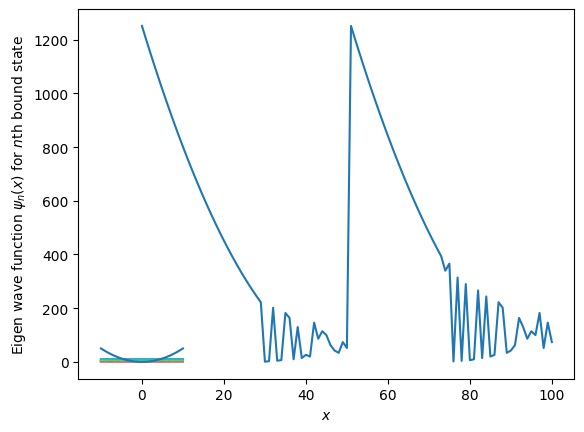

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.integrate import quad
from local_util import prettify_plot, basis, basis_pp, H_nm, gen_H


def V(x, w0):
    return (w0*x)**2 / 2


w0 = 1
N = 101
w = 1
# H = np.zeros((N, N))
# H_fin = np.zeros((N, N))
# for n in range(N):
#     print(n, '\r', end='')
#     for m in range(N):
#         H[n, m] = H_nm(n, m, lambda x: V(x, w0), N, w)
#         # H_fin[n, m] = H_nm_finite_well(n, m, N, w, V0, a)
H_fin = gen_H(V=lambda x:V(x, w0), N=N, w=w)

val, vec = np.linalg.eig(H_fin)
val = np.real(val)
plt.plot(val)
idx = np.argwhere(val < 10).T[0]
print('bound states eigenergy is: ', val[idx])

prettify_plot()
x = np.linspace(-10, 10, 1000)
psi = np.zeros([idx.size, x.size])
for i in range(N):
    for j in range(idx.size):
        psi[j] += np.array([vec[i, idx[j]] * basis(xi, i, N, w) for xi in x])
for j in range(idx.size):
    print('check normalization: ', np.trapz(psi[j]**2, x))
    plt.plot(x, psi[j] + val[idx[j]])

plt.plot(x, V(x, w0))
plt.xlabel(r'$x$')
plt.ylabel(r'Eigen wave function $\psi_n(x)$ for $n$th bound state')
plt.show()


In [22]:
from scipy.integrate import quad
print(quad(lambda x: x**2*np.cos(1.3*x), 0, 1))

def quad_break(func: callable, a, b, points, **kwargs):
    points = np.sort(points)
    if a >= points[0] or b <= points[-1]:
        raise ValueError('points must be inside [a, b]')
    res = [0, 0]
    ps = np.concatenate([[a], points, [b]])
    for i in range(len(ps) - 1):
        print('==========', ps[i], ps[i+1])
        resi = np.array(quad(func, ps[i], ps[i+1], **kwargs))
        res[0] += resi[0]
        res[1] += resi[1]
    return res
print(quad(lambda x: x**2, 0, 1, weight='cos', wvar=1.3))
quad_break(lambda x: x**2, 0, 1, weight='cos', wvar=1.3, points=[.5, .6, .9])

(0.18060715382093648, 2.00514220584021e-15)
(0.18060715382093645, 2.0051422058402095e-15)
========== 0.0 0.5
========== 0.5 0.6
========== 0.6 0.9
========== 0.9 1.0


[0.18060715382093648, 2.0051422058402103e-15]

In [20]:
p = np.sort(np.array([1, 3, 2]), )
np.concatenate([[0], p, [4]])

array([0, 1, 2, 3, 4])

In [14]:
quad(lambda x: x**2, 0, 1, weight='cos', wvar=1.3, points=[.5, 1])

/tmp/ipykernel_45008/3318105026.py:1: IntegrationWarning: Break points cannot be specified when using weighted integrand.
Continuing, ignoring specified points.
  quad(lambda x: x**2, 0, 1, weight='cos', wvar=1.3, points=[.5, 1])


(0.18060715382093645, 2.0051422058402095e-15)

In [8]:
list(range(3)[::-1])

[2, 1, 0]

In [4]:
np.real(1+1j)

1.0

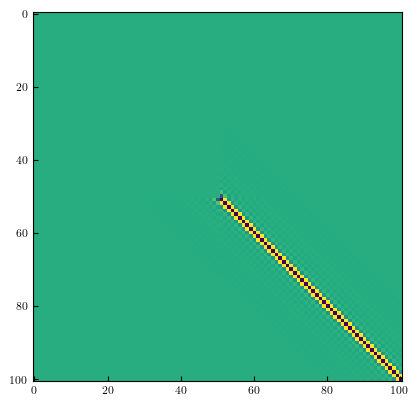

In [5]:
plt.imshow(H_fin)

bound states eigenergy is:  [ 3.41448126 29.45976792 13.47937265 48.1516352 ]
check normalization:  0.9999992456331226
check normalization:  0.99976948258365
check normalization:  0.9999899534505887
check normalization:  0.9285072898608367


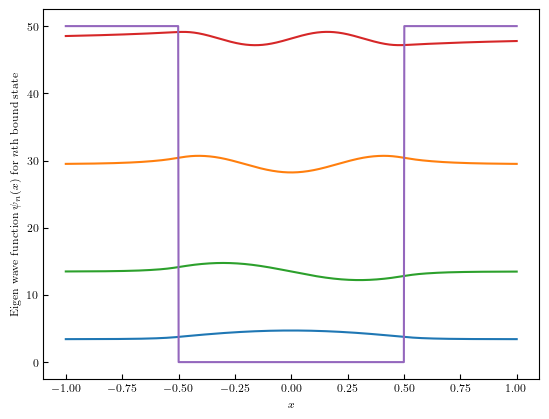

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.integrate import quad
from local_util import prettify_plot, basis, basis_pp, H_nm, gen_H, quad_break


def V(x, V0, a):
    return np.sign(np.abs(x) - a/2) * (V0/2) + V0/2
V0 = 50
a = 1
N = 101
w = 1
# H = np.zeros((N, N))
# H_fin = np.zeros((N, N))
# for n in range(N):
#     print(n, '\r', end='')
#     for m in range(N):
#         # H[n, m] = H_nm(n, m, lambda x:V(x, V0, a), N, w)
#         H_fin[n, m] = H_nm_finite_well(n, m, N, w, V0, a)

H_fin = gen_H(V=lambda x:V(x, V0, a), N=N, w=w, points=[-a/2, a/2])
val, vec = np.linalg.eig(H_fin)
idx = np.argwhere(val < V0).T[0]
print('bound states eigenergy is: ', val[idx])
# [ 3.41357099 13.47572274 29.45230759 48.14346422]

prettify_plot()
x = np.linspace(-a, a, 1000)
psi = np.zeros([idx.size, x.size])
for i in range(N):
    for j in range(idx.size):
        psi[j] += np.array([vec[i, idx[j]] * basis(xi, i, N, w) for xi in x])
for j in range(idx.size):
    print('check normalization: ', np.trapz(psi[j]**2, x))
    plt.plot(x, psi[j] + val[idx[j]])

plt.plot(x, V(x, V0, a))
plt.xlabel(r'$x$')
plt.ylabel(r'Eigen wave function $\psi_n(x)$ for $n$th bound state')
plt.show()
